# First question 
   
   ## - how to get more costumers ?

 

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('calendar.csv')
li = pd.read_csv('listings.csv')
rev = pd.read_csv('reviews.csv')



In [112]:
li.head()
list(li.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [121]:
li2=li[['review_scores_rating', 'price']]

In [173]:
# take out rows of null values to get more details 
li2 = li2.dropna()

# taking out the dollar sign for more acuracy 
li2 =li2.astype(str)
li2['price']= li2['price'].str.replace(r"$", "", regex=True)

# we can see that 150$ and lower is the most common price  
li2.price.value_counts(normalize=True)
 

150.00    0.040997
100.00    0.035320
75.00     0.031220
95.00     0.029959
85.00     0.028382
            ...   
290.00    0.000315
102.00    0.000315
557.00    0.000315
365.00    0.000315
198.00    0.000315
Name: price, Length: 260, dtype: float64

In [174]:
# we can see that around 76% are rated 90 and above 
li2.review_scores_rating.value_counts(normalize=True)

100.0    0.246295
98.0     0.092085
96.0     0.087670
97.0     0.083885
95.0     0.081993
94.0     0.062441
93.0     0.058026
99.0     0.046042
90.0     0.043519
80.0     0.035005
92.0     0.033113
91.0     0.030590
87.0     0.017345
89.0     0.016714
88.0     0.014822
85.0     0.007569
84.0     0.007253
86.0     0.005361
83.0     0.004100
60.0     0.003784
82.0     0.003154
70.0     0.002523
73.0     0.002208
76.0     0.001577
72.0     0.001261
78.0     0.001261
77.0     0.001261
40.0     0.001261
75.0     0.000946
81.0     0.000946
71.0     0.000946
67.0     0.000631
74.0     0.000631
66.0     0.000631
68.0     0.000631
79.0     0.000631
55.0     0.000315
57.0     0.000315
20.0     0.000315
65.0     0.000315
53.0     0.000315
64.0     0.000315
Name: review_scores_rating, dtype: float64

In [186]:
#we can see that most of the 100 ratings cost 150$ and lower
li2[li2.review_scores_rating=='100.0'].price.value_counts(normalize=True)

150.00    0.044814
100.00    0.030730
99.00     0.029449
85.00     0.028169
200.00    0.028169
            ...   
545.00    0.001280
311.00    0.001280
22.00     0.001280
118.00    0.001280
299.00    0.001280
Name: price, Length: 167, dtype: float64

# 2- what is the reasonable price for an apartment in seattle? 



In [188]:
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [205]:
# drop row if there is null value 
nonulls = df.dropna()
# remove dollar($) sign and comma(,) for accuracy   
price = nonulls.price.str.replace(',','').str.replace('$','')
## we can see that highest price is $999.00
price.max()

'999.00'

In [91]:
## we can see that lowest price is $10.00
price.min()

'10.00'

<AxesSubplot:ylabel='Frequency'>

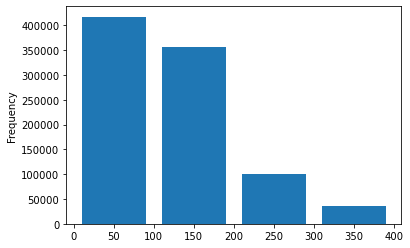

In [217]:
# df[df.available=='f'].date.value_counts(normalize=True)
price=price.astype(float)
price.plot(kind='hist',bins=[0,100,200,300,400],rwidth=0.8)


# 3-  how to get great comments?
    ##-what is the most common price ?

In [218]:
rev.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [227]:
# good location and great host and clean is the most comments
rev[rev.listing_id==7202016].comments

0     Cute and cozy place. Perfect location to every...
1     Kelly has a great room in a very central locat...
2     Very spacious apartment, and in a great neighb...
3     Close to Seattle Center and all it has to offe...
4     Kelly was a great host and very accommodating ...
5     Kelly was great, place was great, just what I ...
6     Kelly was great! Very nice and the neighborhoo...
7     hola all bnb erz - Just left Seattle where I h...
8     Kelly's place is conveniently located on a qui...
9     The place was really nice, clean, and the most...
10    The place was really nice, clean and quiet at ...
11    The listing was exactly as described!  Kelly's...
12    Very welcoming and a nicer place to live in th...
13    Great location, great price, great host! Thank...
14    Staying at Kelly's was easy. The location was ...
15    Kelly was an amazing host who made the stay ve...
Name: comments, dtype: object

In [240]:
rev[rev.listing_id==3624990].comments

84830    The location is super convenient to the state ...
84831    This apartment is in a great location - easy w...
84832    Absolutely perfect stay! Doug & Rebecca were s...
84833    Excellent room, very attentive property manage...
84834    Great, clean place in a perfect location for a...
84835    What an amazing place to stay in Seattle! A fe...
84836    We had an excellent stay at Seattle Suites! Th...
84837    The apartment was clean and accurate to the de...
84838    We were warmly greeted by Doug at the time agr...
84839    The apartment was clean, tidy and as described...
84840    We were with 7 people in rebecca's two 2-bed a...
84841    Great place in the middle of the city. Easy to...
84842    We loved how close it was to the Convention Ce...
84843    Comfortability upon arrival and everything wit...
84844    The description and pictures of the apartment ...
84845    We had an excellent stay. It was clean and com...
84846    Gran ubicación, cerca de todo lo atractivo del.